# Identification

Complete the cell below and run!

In [1]:
print('Full name: ' + 'Mohammad Mowlavi')
print('STD ID: ' + '')

Full name: Mohammad Mowlavi
STD ID: 


# Import Necessary Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ========================================
# Add any needed package
# ========================================

# Question 1

## Introduction

<div> <font face = "Tahoma" size = 4> <p style = "text-indent:25px; line-height:1.3;">
In the slides, you have been introduced to neurons and their encoding behavior of sensory input. You have learned about receptive fields and that each neuron reponds best to a certain amount in the sensory input's parameter.</p>
<p>In the most simple case, the neuron's firing rate based on the input's parameter can be assumed to be a Gaussian distribution with its mean at the neuron's optimum firing rate. This fact can be observed in the following picture.</p>
</font>
</div>    </font> <br>
</div>

![Receptive_Fields.png](Receptive_Fields.png)

## Briefing

<div> <font face = "Tahoma" size = 4> <p style = "text-indent:25px; line-height:1.3;">
In this question you are supposed to create a sinwave and feed it to a spiking LIF neuron as the input. The neuron's membrane potential follows the differential equation : </p>
</font>
</div>

<font face = "Tahoma" size = 4>
$$
\begin{gather}
\tau_m\;\frac{dv}{dt} = v_{rest} - v + input \\
\end{gather}
$$
</font>
<font face = "Tahoma" size = 4>
    The membrane potential is constantly compared with a <b>threshold</b>. If the value exceeds the threshold, the neuron generates a spike and resets to value $$v_{rest}$$.
</font>
</div>

## Implementation (15 Points)

<font face = "Tahoma" size = 4>
Since spike times are needed later for the plots, you'd better solve the equation iteratively using Euler method rather than using <b>ode45</b>.<br><br>
Complete the following block in order to simulate the neuron and generate spikes!
</font>

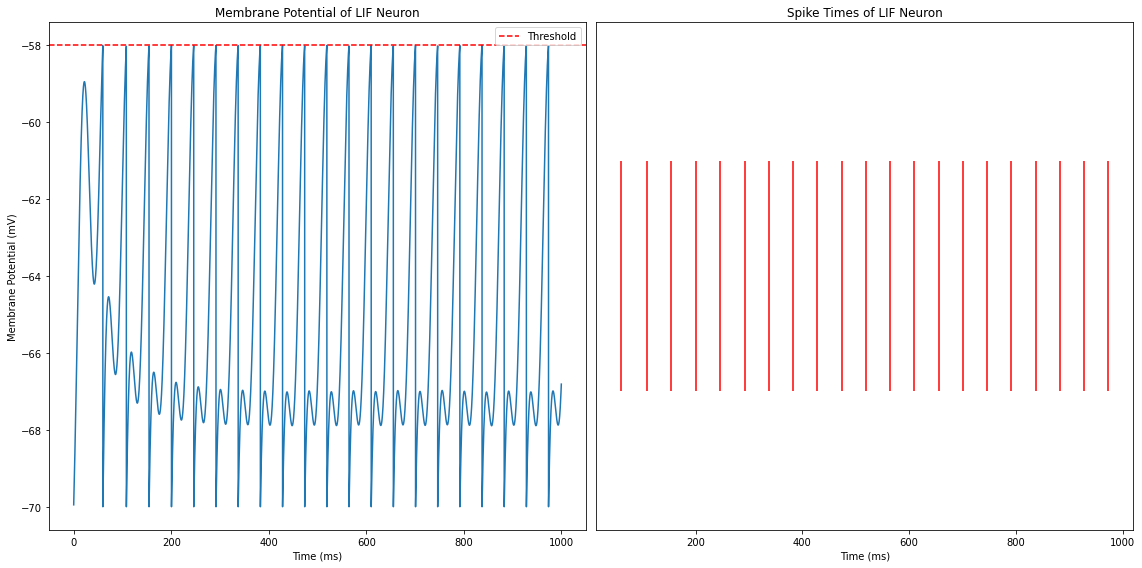

In [4]:
# Parameters for the Leaky Integrate-and-Fire (LIF) neuron model
tau_m = 20  # Membrane time constant (ms)
v_rest = -70  # Resting membrane potential (mV)
v_threshold = -58 # Spike threshold (mV)

# Simulation time
dt = 0.1  # Time step (ms)
t_sim = 1000  # Total simulation time (ms)
num_steps = int(t_sim / dt)

# Simulated sensory input signal
frequency = 22
input_signal = np.sin(2 * np.pi * frequency * np.arange(0, t_sim, dt) / 1000) * 10 + 10

# Initialize neuron variables
voltage = v_rest  # Membrane potential
spike_times = []
voltages = []

# Simulate the encoding process
# =======================================================
for step in range(num_steps):
    dv_dt = (v_rest - voltage + input_signal[step]) / tau_m
    voltage += dv_dt * dt
    
    if voltage >= v_threshold:
        spike_times.append(step * dt)
        voltage = v_rest
    
    voltages.append(voltage)


# =======================================================

# Plot the membrane potential and spike times
# =======================================================
plt.figure(figsize=(16, 8))

# Plot membrane potential
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, t_sim, dt), voltages)
plt.axhline(v_threshold, color='r', linestyle='--', label='Threshold')
plt.title('Membrane Potential of LIF Neuron')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()

# Plot spike times
plt.subplot(1, 2, 2)
plt.eventplot(spike_times, linelengths=0.5, color='r')
plt.title('Spike Times of LIF Neuron')
plt.xlabel('Time (ms)')
plt.yticks([])
plt.tight_layout()

# plt.show()
# =======================================================

## A Question! (10 Points)

<font face = "Tahoma" size = 4>
<b>Manipulate the input frequency a little bit. Can you reach a point where you observe maximum number of spikes?</b>
</font>

<font face = "Tahoma" size = 2>
<b>Actually there is not a direct relation between input frequecy and number of spikes, I mean if we change input frequency we can not guess what is the exact spike number. But we can conclude that if we set the input frequency to high, then we do not have any spikes. That is beacuse as the frequency becomes higher the signal will go under huge fluctuations. Therefore in a step size we can not monitor the fluctuations of input signal.</b>
</font>

# Question 2

## Briefing

<font face = "Tahoma" size = 4>
    We discussed that a neuron can encode sensory input into its firing rate. Assuming that the LIF neuron is a sufficient enough model to replicate the behavior of a real neuron, we want to plot the neurons firing rate versus the input signal frequency!
</font>

## Implementation (20 Points)

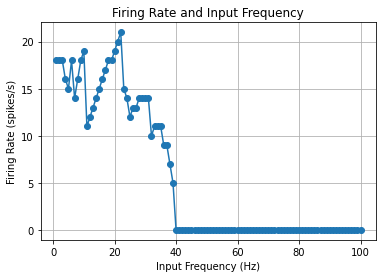

In [4]:
# Parameters for the Leaky Integrate-and-Fire (LIF) neuron model
tau_m = 20  # Membrane time constant (ms)
v_rest = -70  # Resting membrane potential (mV)
v_threshold = -58 # Spike threshold (mV)

# Simulation time
dt = 0.1  # Time step (ms)
t_sim = 1000  # Total simulation time (ms)
num_steps = int(t_sim / dt)

# List to store firing rates for different input frequencies
firing_rates = []

# Range of input frequencies to test
input_frequencies = np.arange(1, 101, 1)  # From 1 Hz to 100 Hz

for frequency in input_frequencies:
    # Simulated sensory input signal (sine wave with varying frequency)
    input_signal = np.sin(2 * np.pi * frequency * np.arange(0, t_sim, dt) / 1000) * 10 + 10

    # Initialize neuron variables
    voltage = v_rest
    spike_times = []  # List to store spike times

    # Simulate the encoding process
    # =======================================================
    for step in range(num_steps):
        dv_dt = (v_rest - voltage + input_signal[step]) / tau_m
        voltage += dv_dt * dt

        if voltage >= v_threshold:
            spike_times.append(step * dt)
            voltage = v_rest

    # =======================================================
    # Calculate the firing rate (spikes per second)
    # =======================================================
    firing_rate = len(spike_times) / (t_sim / 1000)
    firing_rates.append(firing_rate)
    # =======================================================

# Plot firing rate vs. input frequency
# =======================================================
plt.plot(input_frequencies, firing_rates, marker='o')
plt.title('Firing Rate and Input Frequency')
plt.xlabel('Input Frequency (Hz)')
plt.ylabel('Firing Rate (spikes/s)')
plt.grid(True)
plt.show()
# =======================================================

## Another Question! (10 Points)

<font face = "Tahoma" size = 4>
<b>Manipulate the neuron's threshold value. Can you provide a physical explanation as to why different neurons have different optimum receptive fields?</b>
</font>





<font face = "Tahoma" size = 2>
<b>If we manipulate the neuron's threshold value, its firing rate plot will changes, that is because when threshold voltage is closer to rest voltage, neuron spikes more easily and firing rate will increase, and when threshold voltage is further from rest value, neuron spikes hardly and firing rate will decrease. In the pictures below, I set firing rate to -69mV and -55mV to better see closeness effect of threshold volatge to the rest voltage. </b>
</font>

![voltage1.png](voltage1.png)

<font face = "Tahoma" size = 2>
<b>The above picture shows high firing rate, that is beacuse the threshold voltage is set to -69, near to rest value, -70 mV. 
    
The following shows low firing rate, that is beacuse the threshold voltage is set to -55, far from rest value.    </b>
</font>

![voltage2.png](voltage2.png)

<font face = "Tahoma" size = 2>
<b>Actually different neuron should have different optimum receptive fields in order to recognize and process different tasks. if all neuron have same receptive fields, the some tasks can not be done or recognized properly by our brain. So we can say some neuron that are responsible for connectivity and ceural circuits, should have different receptive field. In the same way, we can say another neurons which are responsible for specialization in sensory modalities also should have different receptive fields. Another reson for this part, I think plasticity and learning is a reason for this, beacuse when we learn something, our receptive fields of neurons will changes. </b>
</font>

# Question 3

## Introduction

<font face = "Tahoma" size = 4>
As opposed to what you observed when encoding a sensory input into a neuron's firing rate, you can decode this firing rate to estimate the sensory input given a firing rate distribution. This estimation can be carried out using a method called <b>Kernel Density Estimation.</b> <br><br>
Since it is assumed that you are provided with the firing rate distribution for the neuron, you need only calculate the probability of observing that firing rate given a <b>probability distribution function</b>. In simple terms, you calculate a likelihood as :

$$
L(fr) = f_X(x = fr)
$$
Where X is a random variable representing the response of a neuron to an arbitrary sensory input. In most practical cases this random variable is assumed to undergo a Gaussian distribution.

</font>

## Briefing

<font face = "Tahoma" size = 4>
    Assume that the sensory input is DC of either 15.1 or 20 amplitude. Each of these inputs leads to a different firing rate based on the receptive field of the generated LIF neuron. First, calculate this ideal firing rate to create a Gaussian distribution of that mean and determine the needed probability distribution function.<br><br>
    After figuring out the pdf, provide a random process to the input neuron. This random process is created as follows :

$$
input = random_{choice}(0,1) \times (20 - 15.1) + 15.1 + AWGN
$$

This means that the input signal to the neuron is Bernoulli random variable of amplitudes aither 15.1 or 20 plus some additive white Gaussian noise of mean 0 and 1 variance.<br><br>
We want to draw 150 samples out of this random process and decode the input using the output firing rate of the neuron. In each trial, you must calculate the probability of the output firing rate being a result of either of the input amplitudes.
</font>

## Same As Before (5 Points)

In [32]:
def calc_firing_rate(input_signal, t_sim):
    # Parameters for the Leaky Integrate-and-Fire (LIF) neuron model
    tau_m = 20  # Membrane time constant (ms)
    v_rest = -70  # Resting membrane potential (mV)
    v_threshold = -55  # Spike threshold (mV)

    # Simulation time
    dt = 0.1  # Time step (ms)
    t_sim = 1000  # Total simulation time (ms)
    num_steps = int(t_sim / dt)

    
    # Initialize neuron variables
    voltage = v_rest # Membrane potential
    spike_times = []  # List to store spike times
    
    # Simulate the encoding process
    # =======================================================
    for step in range(num_steps):
        dv_dt = (v_rest - voltage + input_signal) / tau_m
        voltage += dv_dt * dt

        if voltage >= v_threshold:
            spike_times.append(step * dt)
            voltage = v_rest
    # =======================================================

    return len(spike_times) / (t_sim / 1000)

## Implementation (40 Points)

Accuracy of Prediction is :  0.96


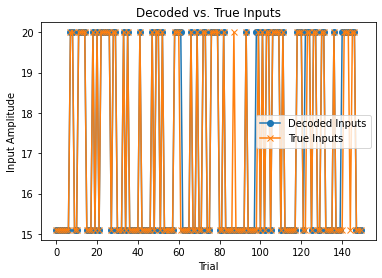

In [36]:
# Constants for binary input
input_0 = 15.1
input_1 = 20

# Simulation time
dt = 0.1  # Time step (ms)
t_sim = 1000  # Total simulation time (ms)
num_steps = int(t_sim / dt)

# Calcualte mean firing rate in a noiseless situation
mean_firing_rate_input_0 = calc_firing_rate(input_0, t_sim)
mean_firing_rate_input_1 = calc_firing_rate(input_1, t_sim)
# Number of trials
num_trials = 150

# Known prior probabilities for the binary input
prior_prob_input_0 = 0.6
prior_prob_input_1 = 1 - prior_prob_input_0
weights = [prior_prob_input_0, prior_prob_input_1]

# Initialize likelihoods
likelihood_input_0 = np.zeros(num_trials)
likelihood_input_1 = np.zeros(num_trials)

# Lists to store decoded inputs and true inputs for test trials
decoded_inputs = []
true_inputs = []

# Simulate multiple trials
for trial in range(num_trials):
    # Simulate sensory input for the trial
    true_input = [input_0, input_1][np.random.choice([0, 1], p=weights)]
    input_signal = true_input + np.random.normal(0, 1)

    # Simulate the encoding process for this trial
    firing_rate = calc_firing_rate(input_signal, t_sim) # Estimated firing rate based on spikes

    # Calculate likelihoods based on Gaussian distributions
    likelihood_input_0[trial] = norm.pdf(firing_rate, loc=mean_firing_rate_input_0, scale=1)
    likelihood_input_1[trial] = norm.pdf(firing_rate, loc=mean_firing_rate_input_1, scale=1)

    # Normalize the likelihoods
    # =======================================================
    total_likelihood = likelihood_input_0[trial] * prior_prob_input_0 + likelihood_input_1[trial] * prior_prob_input_1
    likelihood_input_0[trial] /= total_likelihood
    likelihood_input_1[trial] /= total_likelihood
    # =======================================================

    # Record decoded input for this trial (based on maximum likelihood)
    decoded_input = input_0 if likelihood_input_0[trial] > likelihood_input_1[trial] else input_1

    decoded_inputs.append(decoded_input)
    true_inputs.append(true_input)

correct_predictions = sum(decoded == true_input for decoded, true_input in zip(decoded_inputs, true_inputs))
accuracy = correct_predictions / num_trials
print('Accuracy of Prediction is : ', accuracy)

# =======================================================
plt.plot(decoded_inputs, 'o-', label='Decoded Inputs')
plt.plot(true_inputs, 'x-', label='True Inputs')
plt.title('Decoded vs. True Inputs')
plt.xlabel('Trial')
plt.ylabel('Input Amplitude')
plt.legend()


plt.show()
# =======================================================